<a href="https://colab.research.google.com/github/shubhamraut0209/Quantium-Data-Analytics-Simulation/blob/main/Quantium_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task-1:- Data preparation and customer analytics**

In [ ]:
install.packages("ggmosaic")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘lazyeval’, ‘crosstalk’, ‘productplots’, ‘plotly’, ‘ggrepel’




In [ ]:
#### Load required libraries
library(data.table)
library(ggplot2)
library(ggmosaic)
library(readr)

In [ ]:
library(readxl)

In [ ]:
transactionData=read_excel("/content/QVI_transaction_data (2).xlsx")


In [ ]:
customerData=read.csv('/content/QVI_purchase_behaviour (2).csv')

***Exploratory data analysis***  
The first step in any analysis is to first understand the data. Let’s take a look at each of the datasets provided.

In [ ]:
#### Examine transaction data
str(transactionData)

tibble [264,836 × 8] (S3: tbl_df/tbl/data.frame)
 $ DATE          : num [1:264836] 43390 43599 43605 43329 43330 ...
 $ STORE_NBR     : num [1:264836] 1 1 1 2 2 4 4 4 5 7 ...
 $ LYLTY_CARD_NBR: num [1:264836] 1000 1307 1343 2373 2426 ...
 $ TXN_ID        : num [1:264836] 1 348 383 974 1038 ...
 $ PROD_NBR      : num [1:264836] 5 66 61 69 108 57 16 24 42 52 ...
 $ PROD_NAME     : chr [1:264836] "Natural Chip        Compny SeaSalt175g" "CCs Nacho Cheese    175g" "Smiths Crinkle Cut  Chips Chicken 170g" "Smiths Chip Thinly  S/Cream&Onion 175g" ...
 $ PROD_QTY      : num [1:264836] 2 3 2 5 3 1 1 1 1 2 ...
 $ TOT_SALES     : num [1:264836] 6 6.3 2.9 15 13.8 5.1 5.7 3.6 3.9 7.2 ...


In [ ]:
#### Convert DATE column to a date format
transactionData$DATE = as.Date(transactionData$DATE, origin = "1899-12-30")

In [ ]:
# We should check that we are looking at the right products by examining PROD_NAME.

In [ ]:
#### Examine PROD_NAME
transactionData[, .N, by = PROD_NAME]

Warning message in rbind(parts$upper, chars$ellip_v, parts$lower, deparse.level = 0L):
“number of columns of result is not a multiple of vector length (arg 2)”


⋮

In [ ]:
#### Examine the words in PROD_NAME to see if there are any incorrect entries
#### such as products that are not chips
productWords <- data.table(unlist(strsplit(unique(as.character(transactionData$PROD_NAME)), " ")))
setnames(productWords, 'words')

In [ ]:
# As we are only interested in words that will tell us if the product is chips or not, let’s remove all words with,
# digits and special characters such as ‘&’ from our set of product words. We can do this using grepl().

In [ ]:
#### Removing digits
productWords= productWords[grepl("\\d", words) == FALSE, ]

In [ ]:
#### Removing special characters
productWords= productWords[grepl("[:alpha:]", words), ]

In [ ]:
#### Let's look at the most common words by counting the number of times a word appears and
#### sorting them by this frequency in order of highest to lowest frequency
productWords[, .N, words][order(N, decreasing = TRUE)]

words,N
<chr>,<int>
Chips,21
Smiths,16
Crinkle,14
Kettle,13
Cheese,12
Salt,12
Original,10
Chip,9
Salsa,9


In [ ]:
# There are salsa products in the dataset but we are only interested in the chips category, so let’s remove these.

In [ ]:
#### Remove salsa products
transactionData$SALSA <- grepl("salsa", tolower(transactionData$PROD_NAME))

In [ ]:
transactionData <- transactionData[transactionData$SALSA == FALSE, ]
transactionData$SALSA <- NULL

In [ ]:
#### Summarise the data to check for nulls and possible outliers
summary(transactionData)

      DATE              STORE_NBR     LYLTY_CARD_NBR        TXN_ID       
 Min.   :2018-07-01   Min.   :  1.0   Min.   :   1000   Min.   :      1  
 1st Qu.:2018-09-30   1st Qu.: 70.0   1st Qu.:  70015   1st Qu.:  67569  
 Median :2018-12-30   Median :130.0   Median : 130367   Median : 135183  
 Mean   :2018-12-30   Mean   :135.1   Mean   : 135531   Mean   : 135131  
 3rd Qu.:2019-03-31   3rd Qu.:203.0   3rd Qu.: 203084   3rd Qu.: 202654  
 Max.   :2019-06-30   Max.   :272.0   Max.   :2373711   Max.   :2415841  
    PROD_NBR       PROD_NAME            PROD_QTY         TOT_SALES      
 Min.   :  1.00   Length:246742      Min.   :  1.000   Min.   :  1.700  
 1st Qu.: 26.00   Class :character   1st Qu.:  2.000   1st Qu.:  5.800  
 Median : 53.00   Mode  :character   Median :  2.000   Median :  7.400  
 Mean   : 56.35                      Mean   :  1.908   Mean   :  7.321  
 3rd Qu.: 87.00                      3rd Qu.:  2.000   3rd Qu.:  8.800  
 Max.   :114.00                      Max.   

In [ ]:
library(data.table)
setDT(transactionData)

transactionData[PROD_QTY == 200, ]

DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650
2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650


In [ ]:
#### Filter the dataset to find the outlier
transactionData[PROD_QTY == 200, ]

DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650
2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650


In [ ]:
# There are two transactions where 200 packets of chips are bought in one transaction and both of these transactions where by the same customer.

In [ ]:
#### Let's see if the customer has had other transactions
transactionData[LYLTY_CARD_NBR == 226000, ]

DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650
2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650


In [ ]:
# It looks like this customer has only had the two transactions over the year and is not an ordinary retail customer.
# The customer might be buying chips for commercial purposes instead.
# We’ll remove this loyalty card number from further analysis.

In [ ]:
#### Filter out the customer based on the loyalty card number
transactionData= transactionData[LYLTY_CARD_NBR != 226000, ]

In [ ]:
#### Re‐examine transaction data
summary(transactionData)

      DATE              STORE_NBR     LYLTY_CARD_NBR        TXN_ID       
 Min.   :2018-07-01   Min.   :  1.0   Min.   :   1000   Min.   :      1  
 1st Qu.:2018-09-30   1st Qu.: 70.0   1st Qu.:  70015   1st Qu.:  67569  
 Median :2018-12-30   Median :130.0   Median : 130367   Median : 135182  
 Mean   :2018-12-30   Mean   :135.1   Mean   : 135530   Mean   : 135130  
 3rd Qu.:2019-03-31   3rd Qu.:203.0   3rd Qu.: 203083   3rd Qu.: 202652  
 Max.   :2019-06-30   Max.   :272.0   Max.   :2373711   Max.   :2415841  
    PROD_NBR       PROD_NAME            PROD_QTY       TOT_SALES     
 Min.   :  1.00   Length:246740      Min.   :1.000   Min.   : 1.700  
 1st Qu.: 26.00   Class :character   1st Qu.:2.000   1st Qu.: 5.800  
 Median : 53.00   Mode  :character   Median :2.000   Median : 7.400  
 Mean   : 56.35                      Mean   :1.906   Mean   : 7.316  
 3rd Qu.: 87.00                      3rd Qu.:2.000   3rd Qu.: 8.800  
 Max.   :114.00                      Max.   :5.000   Max.   :2

In [ ]:
# That’s better. Now, let’s look at the number of transaction lines over time to see if there are any obvious data issues such as missing data.

In [ ]:
#### Count the number of transactions by date
transactionData[, .N, by = DATE]

DATE,N
<date>,<int>
2018-10-17,682
2019-05-14,705
2019-05-20,707
2018-08-17,663
2018-08-18,683
2019-05-16,664
2018-08-20,644
2019-05-17,652
2019-05-18,626


In [ ]:
# There’s only 364 rows, meaning only 364 dates which indicates a missing date.
# Let’s create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a chart of number of transactions over time to find the missing date.

In [ ]:
#### Create a sequence of dates and join this the count of transactions by date
allDates= data.table(seq(as.Date("2018/07/01"), as.Date("2019/06/30"), by ="day"))
setnames(allDates, "DATE")
transactions_by_day= merge(allDates, transactionData[, .N, by = DATE], all.x= TRUE)

In [ ]:
#### Setting plot themes to format graphs
theme_set(theme_bw())
theme_update(plot.title = element_text(hjust = 0.5))

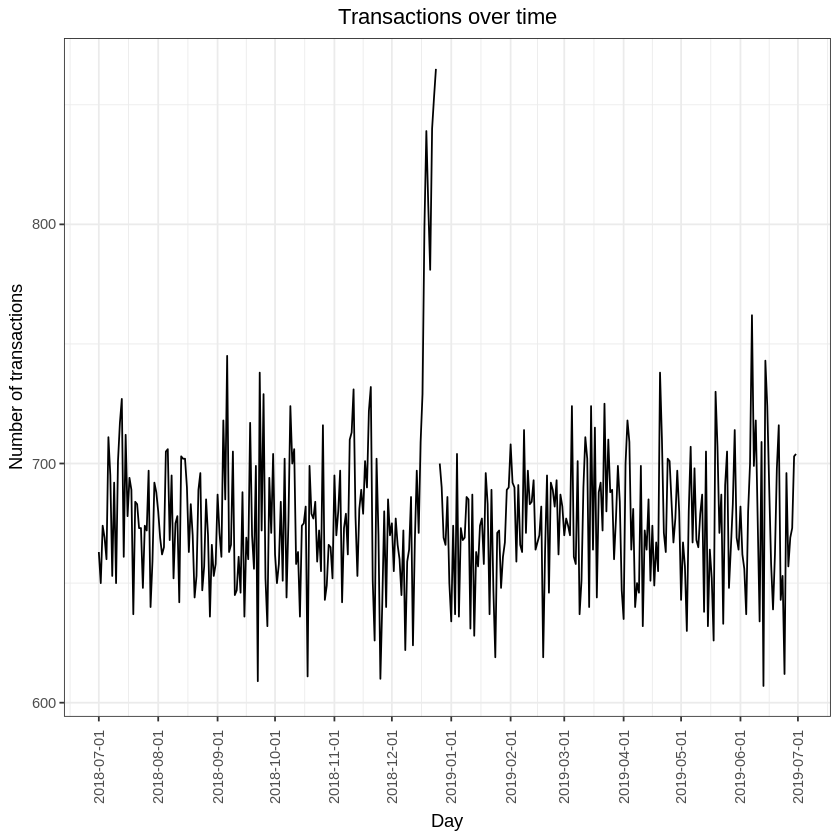

In [ ]:
#### Plot transactions over time
ggplot(transactions_by_day, aes(x = DATE, y = N)) +
geom_line() +
labs(x = "Day", y = "Number of transactions", title = "Transactions over time") +
scale_x_date(breaks = "1 month") +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5))

In [ ]:
# We can see that there is an increase in purchases in December and a break in late December. Let’s zoom in on this.

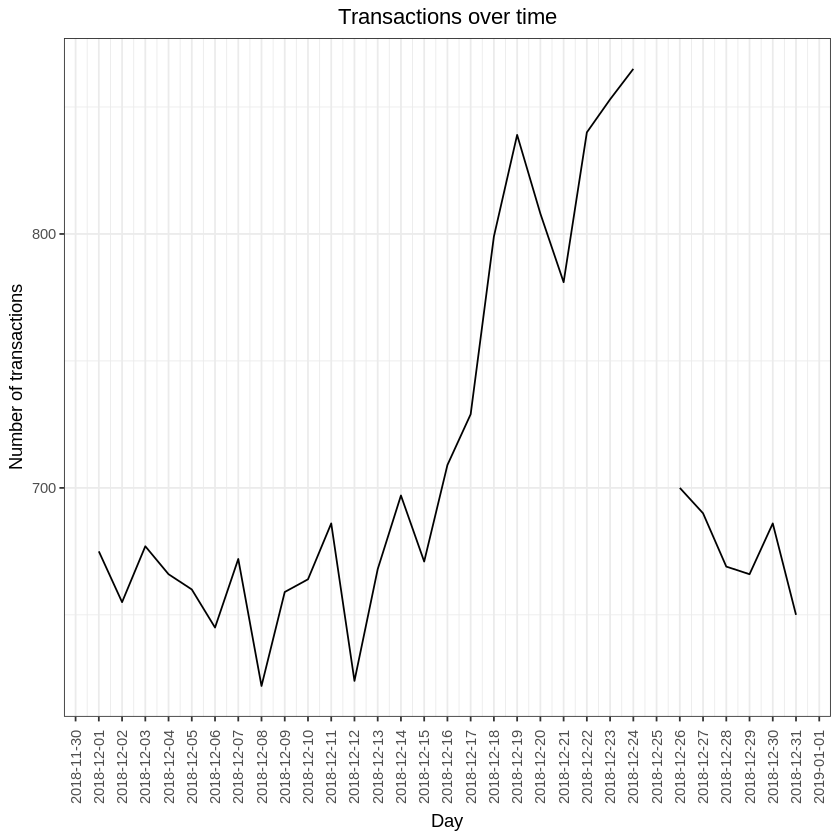

In [ ]:
#### Filter to December and look at individual days
ggplot(transactions_by_day[month(DATE) == 12, ], aes(x = DATE, y = N)) +
geom_line() +
labs(x = "Day", y = "Number of transactions", title = "Transactions over time") +
scale_x_date(breaks = "1 day") +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5))

In [ ]:
# We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself.
# This is due to shops being closed on Christmas day.

In [ ]:
# Now that we are satisfied that the data no longer has outliers, we can move on to creating other features such as brand of chips or pack size from PROD_NAME.
# We will start with pack size.

In [ ]:
#### Pack size
#### We can work this out by taking the digits that are in PROD_NAME
transactionData[, PACK_SIZE := parse_number(PROD_NAME)]

In [ ]:
#### Let's check if the pack sizes look sensible
transactionData[, .N, PACK_SIZE][order(PACK_SIZE)]

PACK_SIZE,N
<dbl>,<int>
70,1507
90,3008
110,22387
125,1454
134,25102
135,3257
150,40203
160,2970
165,15297


In [ ]:
# The largest size is 380g and the smallest size is 70g - seems sensible!

In [ ]:
#### Let's check the output of the first few rows to see if we have indeed picked out pack size.
transactionData

DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150
2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330
2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,210
2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150
2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,210


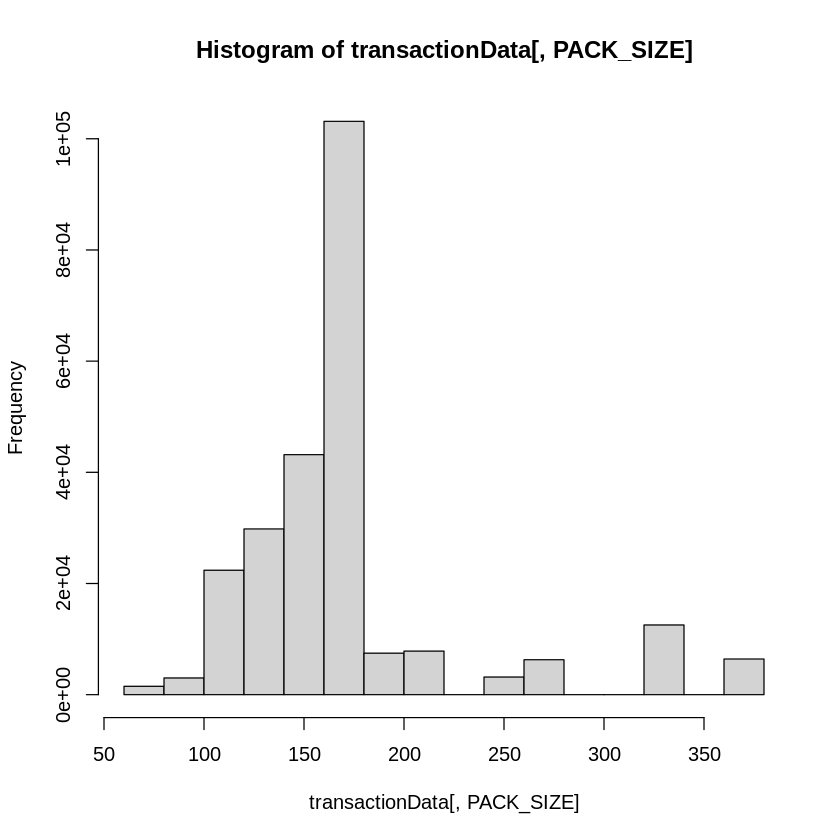

In [ ]:
#### Let's plot a histogram of PACK_SIZE since we know that it is a categorical variable and not a continuous variable even though it is numeric.
hist(transactionData[, PACK_SIZE])

In [ ]:
# Pack sizes created look reasonable and now to create brands, we can use the first word in PROD_NAME to work out the brand name

In [ ]:
#### Brands
transactionData[, BRAND := toupper(substr(PROD_NAME, 1, regexpr(pattern = ' ',PROD_NAME) - 1))]

In [ ]:
#### Checking brands
transactionData[, .N, by = BRAND][order(-N)]

BRAND,N
<chr>,<int>
KETTLE,41288
SMITHS,27390
PRINGLES,25102
DORITOS,22041
THINS,14075
RRD,11894
INFUZIONS,11057
WW,10320
COBS,9693


In [ ]:
# Some of the brand names look like they are of the same brands - such as RED and RRD, which are both Red Rock Deli chips.
# Let’s combine these together.

In [ ]:
#### Clean brand names
transactionData[BRAND == "RED", BRAND := "RRD"]
transactionData[BRAND == "SNBTS", BRAND := "SUNBITES"]
transactionData[BRAND == "INFZNS", BRAND := "INFUZIONS"]
transactionData[BRAND == "WW", BRAND := "WOOLWORTHS"]
transactionData[BRAND == "SMITH", BRAND := "SMITHS"]
transactionData[BRAND == "NCC", BRAND := "NATURAL"]
transactionData[BRAND == "DORITO", BRAND := "DORITOS"]
transactionData[BRAND == "GRAIN", BRAND := "GRNWVES"]

In [ ]:
#### Check again
transactionData[, .N, by = BRAND][order(BRAND)]

BRAND,N
<chr>,<int>
BURGER,1564
CCS,4551
CHEETOS,2927
CHEEZELS,4603
COBS,9693
DORITOS,25224
FRENCH,1418
GRNWVES,7740
INFUZIONS,14201


In [ ]:
# Now that we are happy with the transaction dataset, let’s have a look at the customer dataset.

In [ ]:
#### Examining customer data
str(customerData)

'data.frame':	72637 obs. of  3 variables:
 $ LYLTY_CARD_NBR  : int  1000 1002 1003 1004 1005 1007 1009 1010 1011 1012 ...
 $ LIFESTAGE       : chr  "YOUNG SINGLES/COUPLES" "YOUNG SINGLES/COUPLES" "YOUNG FAMILIES" "OLDER SINGLES/COUPLES" ...
 $ PREMIUM_CUSTOMER: chr  "Premium" "Mainstream" "Budget" "Mainstream" ...


In [ ]:
summary(customerData)

 LYLTY_CARD_NBR     LIFESTAGE         PREMIUM_CUSTOMER  
 Min.   :   1000   Length:72637       Length:72637      
 1st Qu.:  66202   Class :character   Class :character  
 Median : 134040   Mode  :character   Mode  :character  
 Mean   : 136186                                        
 3rd Qu.: 203375                                        
 Max.   :2373711                                        

In [ ]:
# Let’s have a closer look at the LIFESTAGE and PREMIUM_CUSTOMER columns.

#### Examining the values of lifestage and premium_customer
library(data.table)
setDT(customerData)

customerData[, .N, by = LIFESTAGE][order(-N)]

LIFESTAGE,N
<chr>,<int>
RETIREES,14805
OLDER SINGLES/COUPLES,14609
YOUNG SINGLES/COUPLES,14441
OLDER FAMILIES,9780
YOUNG FAMILIES,9178
MIDAGE SINGLES/COUPLES,7275
NEW FAMILIES,2549


In [ ]:
customerData[, .N, by = PREMIUM_CUSTOMER][order(-N)]

PREMIUM_CUSTOMER,N
<chr>,<int>
Mainstream,29245
Budget,24470
Premium,18922


In [ ]:
# As there do not seem to be any issues with the customer data, we can now go ahead and join the transaction and customer data sets together

In [ ]:
#### Merge transaction data to customer data
data= merge(transactionData, customerData, all.x = TRUE)

In [ ]:
# As the number of rows in data is the same as that of transactionData, we can be sure that no duplicates were created.
# This is because we created data by setting all.x = TRUE (in other words, a left join) which means take all the rows in transactionData and
# find rows with matching values in shared columns and then joining the details in these rows to the x or the first mentioned table.

In [ ]:
# Let’s also check if some customers were not matched on by checking for nulls.

In [ ]:
data[is.null(LIFESTAGE), .N]

[1] 0

In [ ]:
data[is.null(PREMIUM_CUSTOMER), .N]

[1] 0

In [ ]:
# Great, there are no nulls! So all our customers in the transaction data has been accounted for in the customer dataset.

In [ ]:
# Data exploration is now complete!

***Data analysis on customer segments***  
Now that the data is ready for analysis, we can define some metrics of interest to the client:  
• Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is  
• How many customers are in each segment  
• How many chips are bought per customer by segment  
• What’s the average chip price by customer segment

We could also ask our data team for more information. Examples are:  
• The customer’s total spend over the period and total spend for each transaction to understand what proportion of their grocery spend is on chips  
• Proportion of customers in each customer segment overall to compare against the mix of customers who purchase chips

In [ ]:
# Let’s start with calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and plotting the split by these segments to describe
# which customer segment contribute most to chip sales.

In [ ]:
#### Total sales by LIFESTAGE and PREMIUM_CUSTOMER
sales= data[, .(SALES = sum(TOT_SALES)), .(LIFESTAGE, PREMIUM_CUSTOMER)]

In [ ]:
#### Create plot
p= ggplot(data = sales) +
geom_mosaic(aes(weight = SALES, x = product(PREMIUM_CUSTOMER, LIFESTAGE), fill = PREMIUM_CUSTOMER)) +
labs(x = "Lifestage", y = "Premium customer flag", title = "Proportion of sales") +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5))

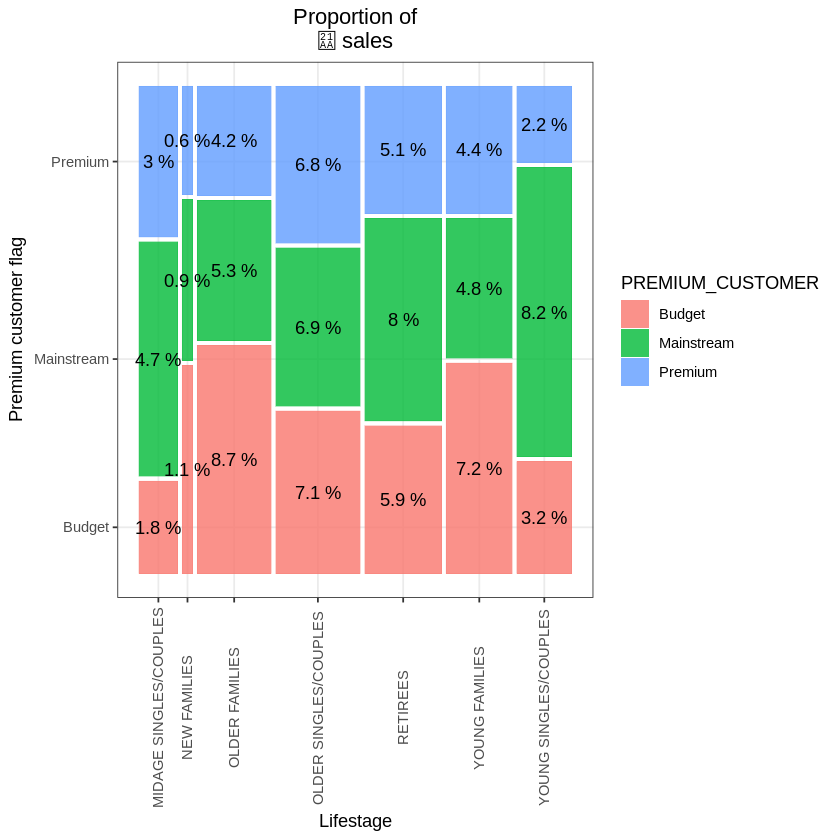

In [ ]:
#### Plot and label with proportion of sales
p + geom_text(data = ggplot_build(p)$data[[1]], aes(x = (xmin + xmax)/2 , y =
(ymin + ymax)/2, label = as.character(paste(round(.wt/sum(.wt),3)*100,'%'))))

In [ ]:
# Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream- retirees

In [ ]:
# Let’s see if the higher sales are due to there being more customers who buy chips.

In [ ]:
#### Number of customers by LIFESTAGE and PREMIUM_CUSTOMER
customers= data[, .(CUSTOMERS = uniqueN(LYLTY_CARD_NBR)), .(LIFESTAGE, PREMIUM_CUSTOMER)][order(-CUSTOMERS)]

In [ ]:
#### Create plot
p= ggplot(data = customers) +
geom_mosaic(aes(weight = CUSTOMERS, x = product(PREMIUM_CUSTOMER, LIFESTAGE), fill = PREMIUM_CUSTOMER)) +
labs(x = "Lifestage", y = "Premium customer flag", title = "Proportion of customers") +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5))

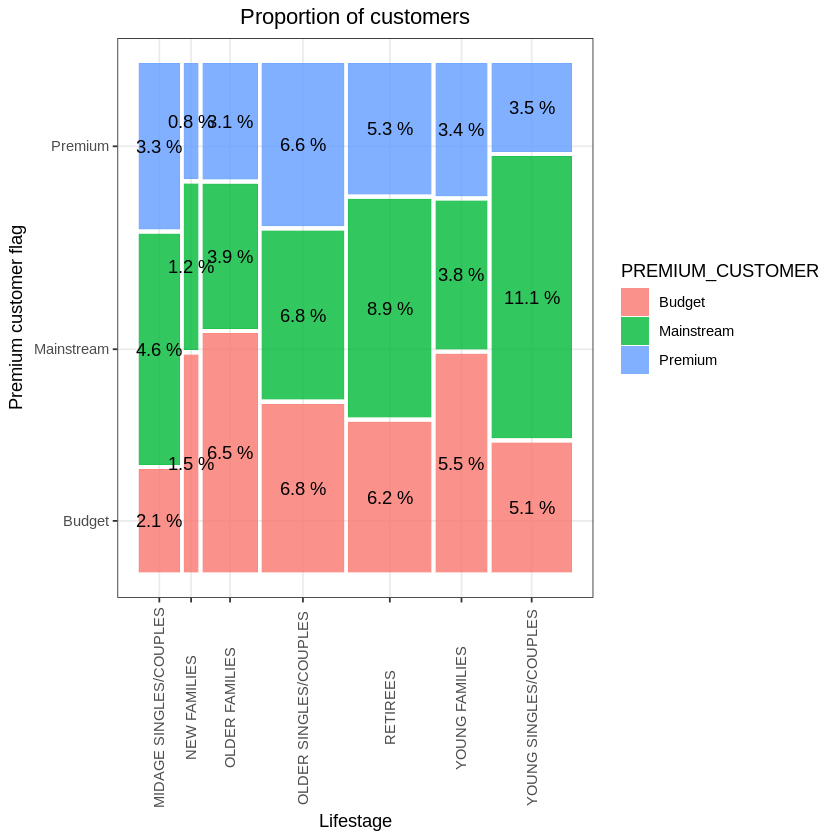

In [ ]:
#### Plot and label with proportion of customers
p + geom_text(data = ggplot_build(p)$data[[1]], aes(x = (xmin + xmax)/2 , y =
(ymin + ymax)/2, label = as.character(paste(round(.wt/sum(.wt),3)*100,'%'))))

In [ ]:
# There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips.
# This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment.

In [ ]:
# Higher sales may also be driven by more units of chips being bought per customer. Let’s have a look at this next.

In [ ]:
#### Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
avg_units= data[, .(AVG = sum(PROD_QTY)/uniqueN(LYLTY_CARD_NBR)), .(LIFESTAGE, PREMIUM_CUSTOMER)][order(-AVG)]

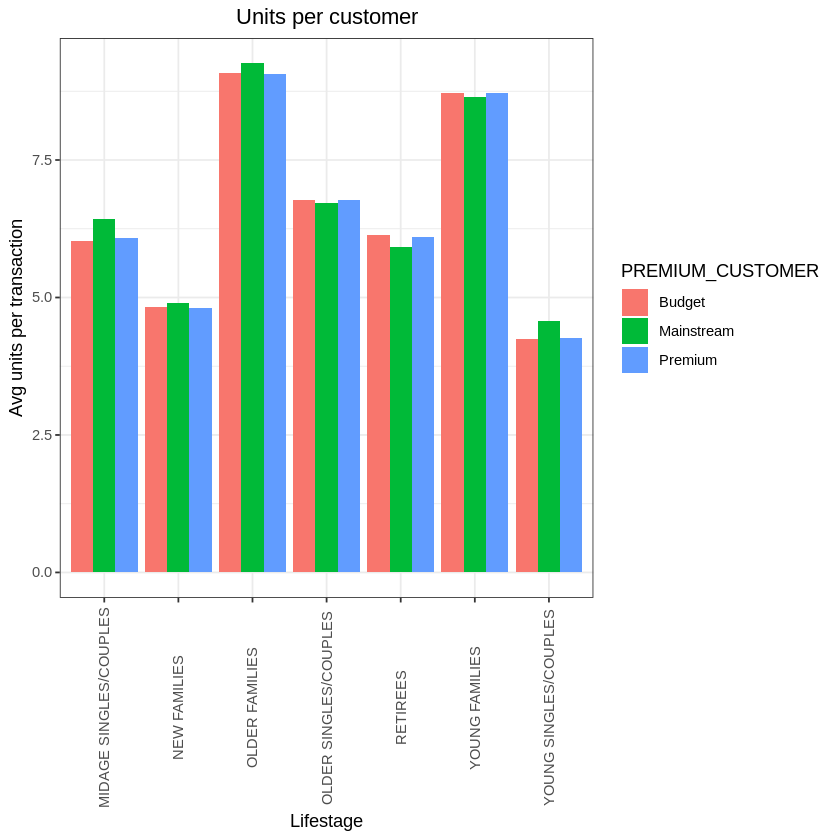

In [ ]:
#### Create plot
ggplot(data = avg_units, aes(weight = AVG, x = LIFESTAGE, fill = PREMIUM_CUSTOMER)) +
geom_bar(position = position_dodge()) +
labs(x = "Lifestage", y = "Avg units per transaction", title = "Units per customer") +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5))

In [ ]:
# Older families and young families in general buy more chips per customer

In [ ]:
# Let’s also investigate the average price per unit chips bought for each customer segment as this is also a driver of total sales.

In [ ]:
#### Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
avg_price= data[, .(AVG = sum(TOT_SALES)/sum(PROD_QTY)), .(LIFESTAGE, PREMIUM_CUSTOMER)][order(-AVG)]

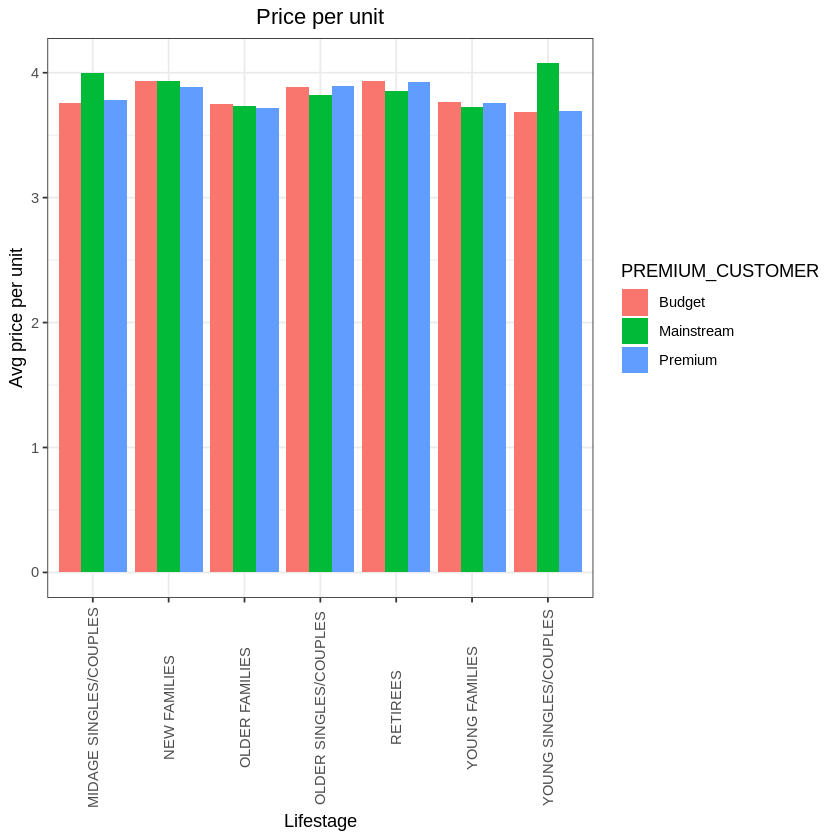

In [ ]:
#### Create plot
ggplot(data = avg_price, aes(weight = AVG, x = LIFESTAGE, fill = PREMIUM_CUSTOMER)) +
geom_bar(position = position_dodge()) +
labs(x = "Lifestage", y = "Avg price per unit", title = "Price per unit") +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5))

In [ ]:
# Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts.
# This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes,
# rather than their own consumption.
# This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

In [ ]:
# As the difference in average price per unit isn’t large, we can check if this difference is statistically different.

In [ ]:
#### Perform an independent t‐test between mainstream vs premium and budget
#### midage and
#### young singles and couples
pricePerUnit= data[, price := TOT_SALES/PROD_QTY]
t.test(data[LIFESTAGE %in% c("YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES") & PREMIUM_CUSTOMER == "Mainstream", price]
, data[LIFESTAGE %in% c("YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES") & PREMIUM_CUSTOMER != "Mainstream", price]
, alternative = "greater")


	Welch Two Sample t-test

data:  data[LIFESTAGE %in% c("YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES") & PREMIUM_CUSTOMER == "Mainstream", price] and data[LIFESTAGE %in% c("YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES") & PREMIUM_CUSTOMER != "Mainstream", price]
t = 37.624, df = 54791, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.3187234       Inf
sample estimates:
mean of x mean of y 
 4.039786  3.706491 


In [ ]:
# The t-test results in a p-value < 2.2e-16,
# i.e. the unit price for mainstream, young and mid-age singles and couples are significantly higher,
# than that of budget or premium, young and midage singles and couples.

***Deep dive into specific customer segments for insights***

In [ ]:
# We have found quite a few interesting insights that we can dive deeper into.
# We might want to target customer segments that contribute the most to sales to retain them or further increase sales.

# Let’s look at Mainstream - young singles/couples.
#For instance, let’s find out if they tend to buy a particular brand of chips.

In [ ]:
#### Deep dive into Mainstream, young singles/couples
segment1= data[LIFESTAGE == "YOUNG SINGLES/COUPLES" & PREMIUM_CUSTOMER == "Mainstream",]
other= data[!(LIFESTAGE == "YOUNG SINGLES/COUPLES" & PREMIUM_CUSTOMER == "Mainstream"),]

In [ ]:
#### Brand affinity compared to the rest of the population
quantity_segment1= segment1[, sum(PROD_QTY)]
quantity_other= other[, sum(PROD_QTY)]
quantity_segment1_by_brand= segment1[, .(targetSegment = sum(PROD_QTY)/quantity_segment1), by = BRAND]
quantity_other_by_brand= other[, .(other = sum(PROD_QTY)/quantity_other), by = BRAND]
brand_proportions= merge(quantity_segment1_by_brand, quantity_other_by_brand)[, affinityToBrand := targetSegment/other]
brand_proportions[order(-affinityToBrand)]

BRAND,targetSegment,other,affinityToBrand
<chr>,<dbl>,<dbl>,<dbl>
TYRRELLS,0.031552795,0.025692464,1.2280953
TWISTIES,0.046183575,0.037876520,1.2193194
DORITOS,0.122760524,0.101074684,1.2145526
KETTLE,0.197984817,0.165553442,1.1958967
TOSTITOS,0.045410628,0.037977861,1.1957131
PRINGLES,0.119420290,0.100634769,1.1866703
COBS,0.044637681,0.039048861,1.1431238
INFUZIONS,0.064679089,0.057064679,1.1334347
THINS,0.060372671,0.056986370,1.0594230


In [ ]:
# We can see that :
# • Mainstream young singles/couples are 23% more likely to purchase Tyrrells chips compared to the rest of the population
# • Mainstream young singles/couples are 56% less likely to purchase Burger Rings compared to the rest of the population

In [ ]:
# Let’s also find out if our target segment tends to buy larger packs of chips

In [ ]:
#### Preferred pack size compared to the rest of the population
quantity_segment1_by_pack= segment1[, .(targetSegment = sum(PROD_QTY)/quantity_segment1), by = PACK_SIZE]
quantity_other_by_pack= other[, .(other = sum(PROD_QTY)/quantity_other), by = PACK_SIZE]

In [ ]:
pack_proportions= merge(quantity_segment1_by_pack, quantity_other_by_pack)[, affinityToPack := targetSegment/other]
pack_proportions[order(-affinityToPack)]

PACK_SIZE,targetSegment,other,affinityToPack
<dbl>,<dbl>,<dbl>,<dbl>
270,0.031828847,0.025095929,1.2682873
380,0.032160110,0.025584213,1.2570295
330,0.061283644,0.050161917,1.2217166
134,0.119420290,0.100634769,1.1866703
110,0.106280193,0.089791190,1.1836372
210,0.029123533,0.025121265,1.1593180
135,0.014768806,0.013075403,1.1295106
250,0.014354727,0.012780590,1.1231662
170,0.080772947,0.080985964,0.9973697


In [ ]:
# It looks like Mainstream young singles/couples are 27% more likely to purchase a 270g pack of chips compared to the rest of the population
# but let’s dive into what brands sell this pack size.

In [ ]:
data[PACK_SIZE == 270, unique(PROD_NAME)]

[1] "Twisties Cheese     270g" "Twisties Chicken270g"

In [ ]:
# Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of purchasing Twisties.

***Conclusion***

In [ ]:
# Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees shoppers.
# We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers.
# Mainstream, midage and young singles and couples are also more likely to pay more per packet of chips.
# This is indicative of impulse buying behaviour.

# We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips compared to the rest of the population.
# The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space,
# near segments where young singles and couples frequent more often to increase visibilty and impulse behaviour.

In [ ]:
# Quantium can help the Category Manager with recommendations of where these segments are,
# and also further help them with measuring the impact of the changed placement.